In [91]:
#importing data 

import requests
import pandas as pd
import json

url = "https://api.cin7.com/api/v1/SalesOrders"
query_params = {
    "rows": 250,
    "where": "createdDate<2023-02-01T00:00:00Z and createdDate>2022-12-31T23:59:59Z",
    #"fields": "Reference,createdDate,FirstName, LastName, projectName,total, LineItems"
    "fields": "total,LineItems"

}

headers = {
    "Content-Type": "application/json"
}

auth = ("DiggsIncUS", "9901f725991a42c4b8ea12917e3c21d9")  # replace with your Cin7 username and password

data = []
page = 1
while True:
    query_params["page"] = page
    response = requests.get(url, headers=headers, params=query_params, auth=auth)
    if response.status_code == 200:
        
        # Append the data from the current page to the list of data
        data += response.json()
        # Check if there are more pages of data to fetch
        if len(response.json()) < 250:
            break
        else:
            page += 1
    else:
        print(f"Request failed with status code {response.status_code}")
        break

df = pd.json_normalize(data)

In [95]:
df.head(3)

,total,lineItems
0,204.24,"[{'id': 173662, 'createdDate': '2023-01-31T23:..."
1,836.90,"[{'id': 173664, 'createdDate': '2023-01-31T23:..."
2,195.00,"[{'id': 173681, 'createdDate': '2023-01-31T23:..."


In [96]:
df = df.explode('lineItems')

In [97]:
# Use json_normalize to flatten the 'lineItems' column
df_line_items = pd.json_normalize(df['lineItems'])


In [98]:
# Apply function to rename columns
df_line_items = df_line_items.rename(columns=lambda x: x.split(".")[-1])


In [99]:
df.head()

,total,lineItems
0,204.24,"{'id': 173662, 'createdDate': '2023-01-31T23:5..."
1,836.90,"{'id': 173664, 'createdDate': '2023-01-31T23:5..."
1,836.90,"{'id': 173665, 'createdDate': '2023-01-31T23:5..."
1,836.90,"{'id': 173666, 'createdDate': '2023-01-31T23:5..."
1,836.90,"{'id': 173667, 'createdDate': '2023-01-31T23:5..."


In [100]:
df = df.reset_index(drop=True)

In [104]:
df_data = df_line_items
df_data.head()

,id,createdDate,transactionId,parentId,productId,productOptionId,integrationRef,sort,code,name,...,sizeCodes,lineComments,unitCost,unitPrice,discount,qtyShipped,holdingQty,accountCode,stockControl,stockMovements
0,173662.0,2023-01-31T23:57:15Z,78808.0,0.0,172.0,117.0,0,10.0,TRV001AOSG,Passenger Travel Carrier - Slate,...,NaN,None,42.9700,185.25,0.0,1.0,0.0,,FIFO,"[{'batch': None, 'quantity': 1.0, 'serial': No..."
1,173664.0,2023-01-31T23:56:06Z,78809.0,0.0,165.0,98.0,0,10.0,PAD018AALG,Snooz - L / Grey,...,NaN,None,41.4259,150.00,15.0,1.0,0.0,,FIFO,"[{'batch': None, 'quantity': 1.0, 'serial': No..."
2,173665.0,2023-01-31T23:56:06Z,78809.0,0.0,192.0,139.0,0,10.0,GRO010AASIR,Groov - Ice,...,NaN,None,3.3760,34.00,3.4,1.0,0.0,,FIFO,"[{'batch': None, 'quantity': 1.0, 'serial': No..."
3,173666.0,2023-01-31T23:56:06Z,78809.0,173663.0,906.0,867.0,0,10.0,CRA022AALW-1,Large Revol Crate; Ash; Box 1,...,NaN,None,201.1600,0.00,0.0,1.0,0.0,None,FIFO,"[{'batch': None, 'quantity': 1.0, 'serial': No..."
4,173667.0,2023-01-31T23:56:06Z,78809.0,173663.0,909.0,870.0,0,10.0,CRA022AALW-2,Large Revol Crate; Ash; Box 2,...,NaN,None,67.1800,0.00,0.0,1.0,0.0,None,FIFO,"[{'batch': None, 'quantity': 1.0, 'serial': No..."


In [ ]:
# Drop the original 'lineItems' column
df_data = df.drop('lineItems', axis=1)

In [105]:
# Remove unwanted columns
df_data = df_data.drop(['parentId', 'productOptionId', 'integrationRef', 'sort', 'sizeCodes', 'lineComments', 'holdingQty', 'accountCode', 'stockControl', 'stockMovements'], axis=1)


In [106]:
# rename the columns
df_data = df_data.rename(columns={'createdDate': 'SalesOrder_createdDate',
                        'reference': 'SalesOrder_reference',
                        'firstName': 'SalesOrder_firstName',
                        'lastName': 'SalesOrder_lastName',
                        'projectName': 'SalesOrder_projectName',
                        'total': 'SalesOrder_total'})
df_data.head(3)
#raw data ready!

,id,SalesOrder_createdDate,transactionId,productId,code,name,option1,option2,option3,qty,styleCode,barcode,unitCost,unitPrice,discount,qtyShipped
0,173662.0,2023-01-31T23:57:15Z,78808.0,172.0,TRV001AOSG,Passenger Travel Carrier - Slate,Grey,OS,,1.0,TRV001AOSG,842469000562,42.9700,185.25,0.0,1.0
1,173664.0,2023-01-31T23:56:06Z,78809.0,165.0,PAD018AALG,Snooz - L / Grey,Grey,L,,1.0,PAD018AALG,842469000302,41.4259,150.00,15.0,1.0
2,173665.0,2023-01-31T23:56:06Z,78809.0,192.0,GRO010AASIR,Groov - Ice,Ice,OS,,1.0,GRO010AASIR,842469000814,3.3760,34.00,3.4,1.0


In [113]:
#import excel file

sku_mapping_df = pd.read_excel('/Users/revatirameshkharate/Desktop/ITP Projects/Diggs BI/Diggs SKU Mapping.xlsx', sheet_name='Sheet1')

#sku_mapping_df['Prod_variant'] = sku_mapping_df['Product Title'] +'-'+ sku_mapping_df['Color'] + '-' +sku_mapping_df['Size']


sku_mapping_df.head(3)


,Diggs SKU,Product Title,Variant,Category,Color,Size,Is Bundle?,Component 1,Component 2,Component 3,Component 4,Prod_variant
0,WSC007AALW,Collar,Collar - Large - Ash,Walk,Ash,Large,N,NaN,NaN,NaN,NaN,Collar- Ash-Large
1,WSC012AALP,Collar,Collar - Large - Blush,Walk,Blush,Large,N,NaN,NaN,NaN,NaN,Collar- Blush-Large
2,WSC040AALP,Collar,Collar - Large - Blush,Walk,Blush,Large,N,NaN,NaN,NaN,NaN,Collar- Blush-Large


In [138]:
#merging dfs

sku_mapping_df.rename(columns = {'Diggs SKU':'styleCode'}, inplace = True)

prod_data = pd.merge(df_data, sku_mapping_df, on='styleCode')
prod_data.head(3)

,id,SalesOrder_createdDate,transactionId,productId,code,name,option1,option2,option3,qty,...,Variant,Category,Color,Size,Is Bundle?,Component 1,Component 2,Component 3,Component 4,Prod_variant
0,173662.0,2023-01-31T23:57:15Z,78808.0,172.0,TRV001AOSG,Passenger Travel Carrier - Slate,Grey,OS,,1.0,...,Passenger - Grey,Travel,Grey,NaN,N,NaN,NaN,NaN,NaN,Passenger- Grey-
1,172811.0,2023-01-30T02:46:05Z,78493.0,172.0,TRV001AOSG,Passenger Travel Carrier - Slate,Grey,OS,,1.0,...,Passenger - Grey,Travel,Grey,NaN,N,NaN,NaN,NaN,NaN,Passenger- Grey-
2,172633.0,2023-01-29T15:48:05Z,78421.0,172.0,TRV001AOSG,Passenger Travel Carrier - Slate,Grey,OS,,1.0,...,Passenger - Grey,Travel,Grey,NaN,N,NaN,NaN,NaN,NaN,Passenger- Grey-


In [139]:
print(prod_data.columns)

Index(['id', 'SalesOrder_createdDate', 'transactionId', 'productId', 'code',
       'name', 'option1', 'option2', 'option3', 'qty', 'styleCode', 'barcode',
       'unitCost', 'unitPrice', 'discount', 'qtyShipped', 'Product Title',
       'Variant', 'Category', 'Color', 'Size', 'Is Bundle?', 'Component 1',
       'Component 2', 'Component 3', 'Component 4', 'Prod_variant'],
      dtype='object')


In [145]:

# group by products sold
#product_sales = df_data.groupby(['styleCode','SalesOrder_reference'])['qty'].sum().sort_values(ascending=False)

product_sales = prod_data.groupby(['Prod_variant'])['qty'].sum().sort_values(ascending=False)

product_sales_df = product_sales.to_frame()
product_sales_df.head(10)

#Mapping products from excel file do here!


,qty
Prod_variant,
Poop Bags--,977.0
Groov- Turquoise-,868.0
Spreadable--,800.0
Bowl Clip-Charcoal-,612.0
Groov- Blush-,583.0
Revol- Ash-Large,434.0
Revol- Ash-Intermediate,425.0
Bowl-Ash-S/M,283.0
Revol- Charcoal-Large,271.0


<AxesSubplot:title={'center':'#Products'}, xlabel='Prod_variant'>

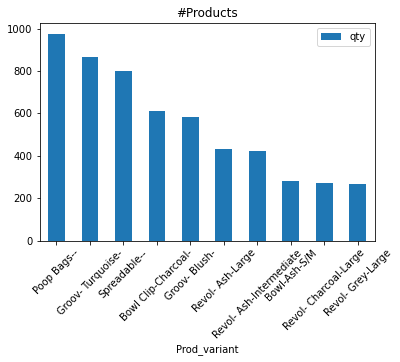

In [161]:
product_sales_df.head(10).plot.bar(title='#Products', rot=45)

In [148]:
import matplotlib.pyplot as plt

#fig1 = product_sales_df.plot(kind = 'bar', x= 'Prod_variant', y ='qty', title ="# Product sales", figsize=(9, 5), legend=True, fontsize=12)

#fig1.set_xlabel("Product", fontsize=12)
#fig1.set_ylabel("Quantity", fontsize=12)
#plt.xticks(rotation=40)
#plt.show()


In [149]:
# group by REVENUE
#product_sales = df_data.groupby(['styleCode','SalesOrder_reference'])['qty'].sum().sort_values(ascending=False)

product_revuene = prod_data.groupby(['Prod_variant'])['unitPrice'].sum().sort_values(ascending=False)

product_revuene_df = product_revuene.to_frame()
product_revuene_df.head(10)

,unitPrice
Prod_variant,
Revol- Ash-Medium,95998.0446
Revol- Ash-Large,93054.8852
Revol- Ash-Small,91012.0924
Revol- Grey-Medium,84628.4770
Revol- Ash-Intermediate,79551.5000
Revol- Charcoal-Large,60653.5490
Revol- Grey-Large,55672.2434
Revol- Grey-Small,52502.2769
Revol- Charcoal-Intermediate,51765.0000


<AxesSubplot:title={'center':'Revenue'}, xlabel='Prod_variant'>

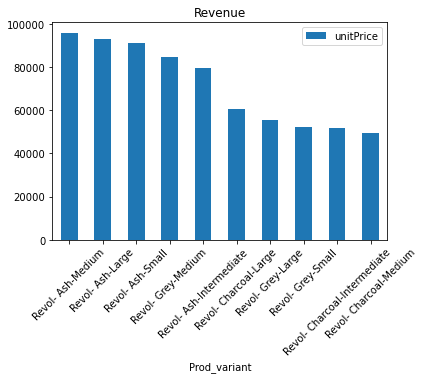

In [162]:
product_revuene_df.head(10).plot.bar(title='Revenue', rot=45)

In [150]:


#fig2 = product_revuene_df.plot(kind = 'bar', x= 'Prod_variant', y ='unitPrice', title ="# Product sales", figsize=(9, 5), legend=True, fontsize=12)

#fig2.set_xlabel("Product", fontsize=12)
#fig2.set_ylabel("Price", fontsize=12)
#plt.xticks(rotation=40)
#plt.show()